# Pymaceutical.Inc Analysis

In [56]:
#importing the necessary libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import scipy as sci
import seaborn as sns

In [27]:
#creating path to files
path_mouse_metadata =  r"C:\Users\jovan\OneDrive\Desktop\Pymaceuticals, Inc. - Module_5\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
path_study_results = r"C:\Users\jovan\OneDrive\Desktop\Pymaceuticals, Inc. - Module_5\Starter_Code\Pymaceuticals\data\Study_results.csv"


#reading the files from above
mouse_metadata = pd.read_csv(path_mouse_metadata)
study_results = pd.read_csv(path_study_results)
#displaying the original files
mouse_metadata
study_results

#mergeing the metadata and results file
merged_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
merged_data.head() #displaying the head of merged_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
#checking for the number of mice in data
num_mice = merged_data["Mouse ID"].value_counts()
count_mice = len(num_mice)

#printing an f-string to show the number of mice
print(f"The number of mice is: {count_mice}")

The number of mice is: 249


In [29]:
#our data should be uniquely identified by Mouse ID and Timepoint
#getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint",]), "Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = merged_data.loc[merged_data["Mouse ID"] == 'g989', :]

dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [31]:
#creating a cleaned dataframe that drops the duplicates
cleaned_mice = merged_data[merged_data["Mouse ID"].isin(dup_mice)==False]

#displaying the head of cleaned dataframe
cleaned_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
#making sure the duplicates were dropped in cleaned dataframe
cleaned_df = cleaned_mice["Mouse ID"].value_counts()
cleaned_merged = len(cleaned_df) 

# Summary Statistics Table

In [33]:
#grouped by "Drug Regimen"
grouped = cleaned_mice.groupby("Drug Regimen")

# calculating the mean, median, variance, standard deviation, and SEM from 'Tumor Volume (mm3)' within grouped
summary_stats = grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

#renaming the columns
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Vol.',
    'median': 'Median Tumor Vol.',
    'var': 'Tumor Vol. Var',
    'std': 'Tumor Vol. Std. Dev',
    'sem': 'Tumor Vol. SEM'
})

# Display the summary statistics table
summary_stats

,Mean Tumor Vol.,Median Tumor Vol.,Tumor Vol. Var,Tumor Vol. Std. Dev,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Box and Pie Charts using Pandas Method then Matplotlib Method

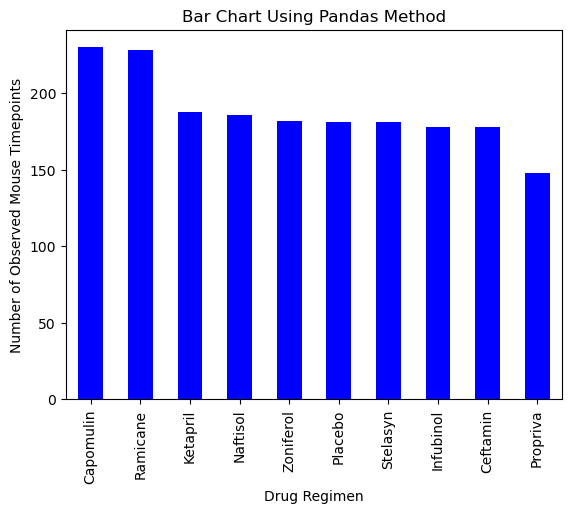

In [34]:
#grouping by drug reg and getting counts
regimen_counts = cleaned_mice['Drug Regimen'].value_counts()

#using Pandas' plot() method
regimen_counts.plot(kind='bar', color='blue')
plt.title("Bar Chart Using Pandas Method")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

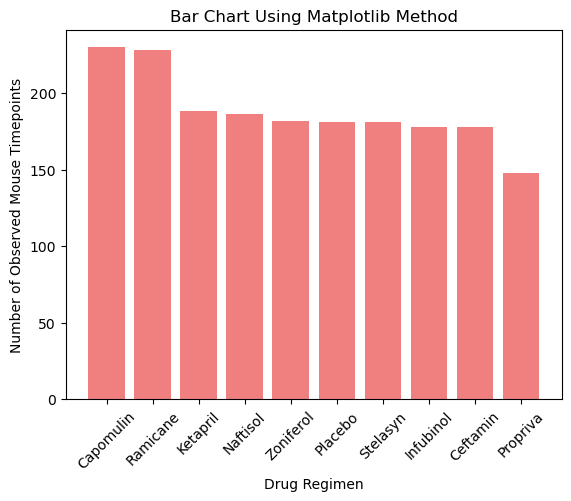

In [35]:
#grouping by drug reg and getting counts
regimen_counts = cleaned_mice['Drug Regimen'].value_counts()

#extracting the regimen names and counts
regimen_names = regimen_counts.index
counts = regimen_counts.values

#creating a bar chart using Matplotlib's pyplot methods
plt.bar(regimen_names, counts, color='lightcoral')
plt.title("Bar Chart Using Matplotlib Method")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

# Pie Charts for the distribution of gender within the sex column 

In [36]:
#counting the number of male and females within the sex column
sex_dist = cleaned_mice["Sex"].value_counts()
sex_dist

Sex
Male      958
Female    922
Name: count, dtype: int64

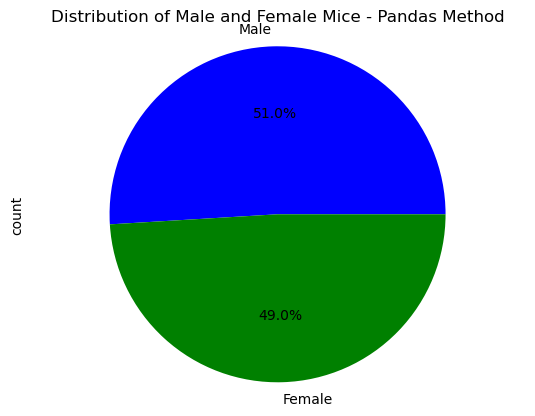

In [37]:
#Creating a pie chart of the sex distribution using Pandas Method
sex_dist.plot(kind="pie", autopct="%1.1f%%", colors=["blue", "green"])
plt.title("Distribution of Male and Female Mice - Pandas Method") #title of chart
plt.axis("equal")

plt.show()

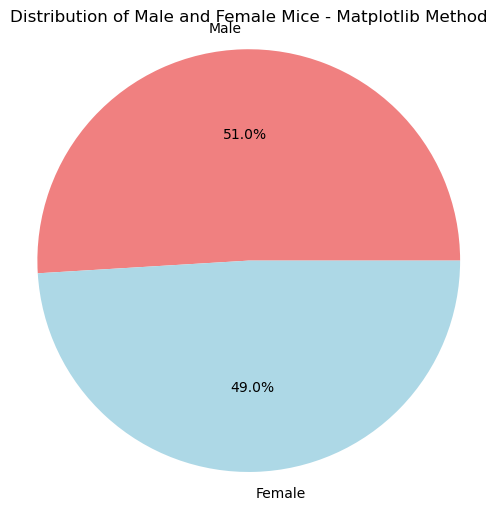

In [38]:
#Generating a pie chart of gender distribution using the matplotlib method
sex_dist = cleaned_mice["Sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sex_dist, labels=sex_dist.index, autopct="%1.1f%%", colors=["lightcoral", "lightblue"])
plt.title("Distribution of Male and Female Mice - Matplotlib Method") #title of chart
plt.axis("equal")

plt.show()

# Quartiles, Outliers, and Box Plots

In [39]:
#created a grouped dataframe that shows the last time point for each mouse and merged with cleaned_mice df
last_tp = cleaned_mice.groupby("Mouse ID")["Timepoint"].max().reset_index() #created a new DF showing last time point for mice

merged_df = pd.merge(last_tp, cleaned_mice, on=["Mouse ID", "Timepoint"], how="left") #merged last_tp and cleaned_mice df into merged_df

merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [40]:
#created a lsit that holds the treatment names as well as a second empty list to hold the tumor volume data
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_certamin = []

In [52]:
#looped through each drug in the treatment list, locating the rows in merged_df to each treatment
#appended results tumor data to empty list
for index, row in merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ramicane':
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Infubinol':
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ceftamin':
        tumor_certamin.append(row['Tumor Volume (mm3)'])
        
#created a df for treatment data
tum_treat = pd.DataFrame({treatments[0]: tumor_capomulin,
                          treatments[1]: tumor_ramicane,
                          treatments[2]: tumor_infubinol,
                          treatments[3]: tumor_certamin })
    
#determining the upper/lower bounds
tum_treat_max = tum_treat.max()
tum_treat_min = tum_treat.min()

tum_treat

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
...,...,...,...,...
95,40.658124,30.276232,51.542431,45.000000
96,39.952347,40.667713,50.005138,64.634949
97,36.041047,43.166373,58.268442,61.386660
98,28.484033,44.183451,67.685569,68.594745


In [55]:
#calculating the quartiles, IQR, and identified potential outliers
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#creating a dictionary to store outliers for each treatment
outliers = {}

#creating a for loop over each treatment
for treatment in treatments:
    treatment_data = tum_treat[treatment].dropna() #extracting the data for the current treatment
    q1 = treatment_data.quantile(0.25) #calculating the quartiles
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1 #calculating interquartiles
    lower_bound = q1 - 1.5 * iqr #defining upper and lower bounds for outliers
    upper_bound = q3 + 1.5 * iqr
    treatment_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)] #identifying outliers
    outliers[treatment] = treatment_outliers.tolist() #storing outliers in the dictionary

# Print only the outliers
print("All Outliers:")
for treatment, treatment_outliers in outliers.items():
    print(f"{treatment}: {treatment_outliers}")

All Outliers:
Capomulin: []
Ramicane: []
Infubinol: [36.3213458, 36.3213458, 36.3213458, 36.3213458]
Ceftamin: []


# Box Plot

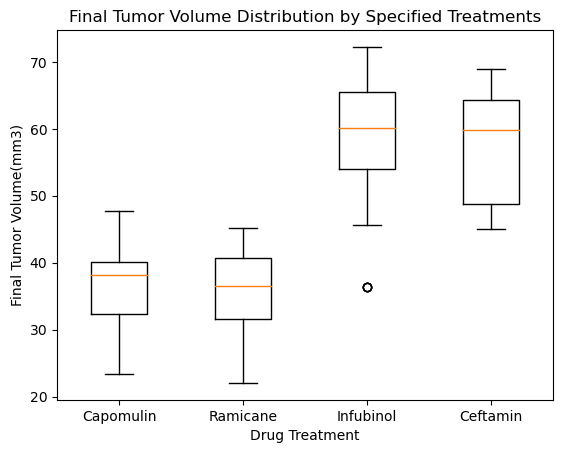

In [61]:
# creating a box plot for the final tumor vol for 'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'

boxplot_data = [tum_treat[treatments[0]],
               tum_treat[treatments[1]],
               tum_treat[treatments[2]],
               tum_treat[treatments[3]]
               ]
                
fig, ax = plt.subplots()

#list that stores data for each treatment
data = []

# Iterate over each treatment
for treatment in treatments:
    #extracting the final tumor volume data for the current treatment
    treatment_data = tum_treat[treatment].dropna()
    data.append(treatment_data)

#creating the box plot
ax.boxplot(data, labels=treatments)
ax.set_title('Final Tumor Volume Distribution by Specified Treatments')
ax.set_xlabel('Drug Treatment')
ax.set_ylabel('Final Tumor Volume(mm3)')

plt.show()

# Line Plot and Scatter Plot

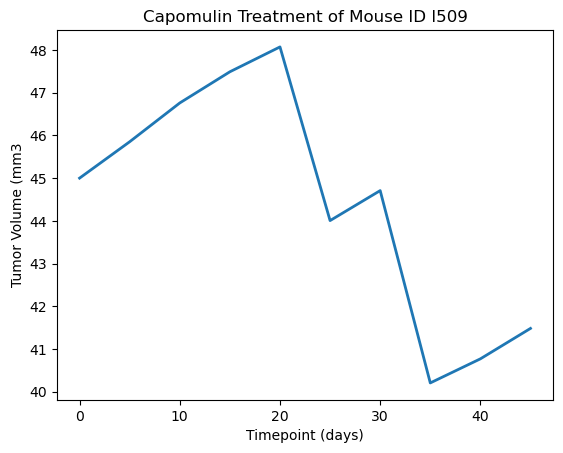

In [65]:
#created a new df called line_plot for chart
line_plot = cleaned_mice.loc[cleaned_mice["Mouse ID"] == "l509",:]
xaxis = line_plot["Timepoint"]
yaxis = line_plot["Tumor Volume (mm3)"]

plt.title('Capomulin Treatment of Mouse ID l509')
plt.plot(xaxis, yaxis, linewidth=2, markersize=12)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3")

plt.show()

# Correlation and Regression